# UnSupervised Learning

# K-means Algorithm

In [1]:
#use dataset income.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("income.csv")

In [4]:
df.head()

,Name,Age,Income
0,Anu,27,70000
1,seema,29,90000
2,suresh,29,61000
3,kamal,28,60000
4,poonam,42,150000


In [5]:
df.shape

(22, 3)

In [6]:
#check null in dataset
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Name      22 non-null object
Age       22 non-null int64
Income    22 non-null int64
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


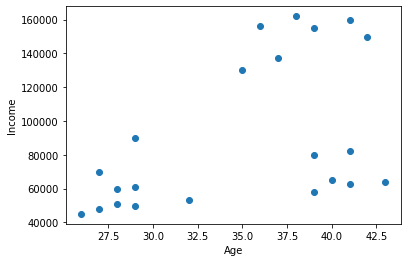

In [8]:
#Visualisation 
plt.scatter(df['Age'],df['Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
#create the object of KMeans
km=KMeans(n_clusters=3)  #n_clusters inbuilt parameter -how many clusters

In [11]:
#we train and test the model use fit_predict()
y_pred=km.fit_predict(df[['Age','Income']])   #accept always 2D array means[[ ]] 
#many input 

In [12]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [13]:
#Add new field (column) in exisiting dataframe df
df['Cluster']=y_pred

In [14]:
df

,Name,Age,Income,Cluster
0,Anu,27,70000,2
1,seema,29,90000,2
2,suresh,29,61000,0
3,kamal,28,60000,0
4,poonam,42,150000,1
5,geeta,39,155000,1
6,tina,41,160000,1
7,rekha,38,162000,1
8,ravi,36,156000,1
9,babita,35,130000,1


In [15]:
#Lecture 1-Nov-2020

In [16]:
#To show centeroid of all clusters
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [17]:
#Visualisation with the help of scatter plot after training_testing
#Create 3 dataframe according to cluster
df1=df[df["Cluster"]==0]  #df[index means condition]
df2=df[df["Cluster"]==1]
df3=df[df["Cluster"]==2]

In [18]:
df1

,Name,Age,Income,Cluster
2,suresh,29,61000,0
3,kamal,28,60000,0
11,deepa,26,45000,0
12,jitendra,27,48000,0
13,archana,28,51000,0
14,latita,29,49500,0
15,john,32,53000,0
16,sohan,40,65000,0
17,rohan,41,63000,0
18,mohan,43,64000,0


In [19]:
df2

,Name,Age,Income,Cluster
4,poonam,42,150000,1
5,geeta,39,155000,1
6,tina,41,160000,1
7,rekha,38,162000,1
8,ravi,36,156000,1
9,babita,35,130000,1
10,renu,37,137000,1


In [20]:
df3

,Name,Age,Income,Cluster
0,Anu,27,70000,2
1,seema,29,90000,2
19,binu,39,80000,2
20,deepa,41,82000,2


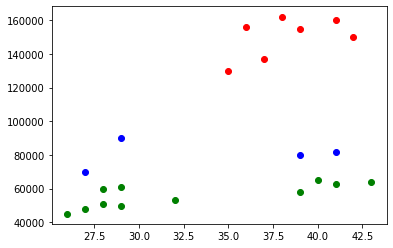

In [21]:
#scatter plot 
plt.scatter(df1["Age"],df1["Income"],color="green")
plt.scatter(df2["Age"],df2["Income"],color="red")
plt.scatter(df3["Age"],df3["Income"],color="blue")
plt.show()

In [ ]:
#output is not correct why ? scaling of dataset is not proper
#We apply scaling in dataset because unit of features age and income
#are different
'''standard scaler z= x-mean/std'''

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss=StandardScaler()
#ss is a user defined object of StandardScaler class
df["Age"]=ss.fit_transform(df[["Age"]]) #[[]]
df["Income"]=ss.fit_transform(df[["Income"]])

In [24]:
df.head()

,Name,Age,Income,Cluster
0,Anu,-1.356055,-0.480684,2
1,seema,-1.009157,-0.010159,2
2,suresh,-1.009157,-0.692421,0
3,kamal,-1.182606,-0.715947,0
4,poonam,1.245679,1.401417,1


In [ ]:
#After scaling . again train the model

In [25]:
#create the object of KMeans
km=KMeans(n_clusters=3)  

In [26]:
#we train and test the model use fit_predict()
y_pred=km.fit_predict(df[['Age','Income']])  

In [27]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
#Add new field (column) in exisiting dataframe df
df['Cluster']=y_pred

In [29]:
df

,Name,Age,Income,Cluster
0,Anu,-1.356055,-0.480684,1
1,seema,-1.009157,-0.010159,1
2,suresh,-1.009157,-0.692421,1
3,kamal,-1.182606,-0.715947,1
4,poonam,1.245679,1.401417,0
5,geeta,0.725332,1.519048,0
6,tina,1.072230,1.636679,0
7,rekha,0.551883,1.683732,0
8,ravi,0.204985,1.542574,0
9,babita,0.031536,0.930891,0


In [30]:
#Create 3 dataframe according to cluster
df1=df[df["Cluster"]==0]  
df2=df[df["Cluster"]==1]
df3=df[df["Cluster"]==2]

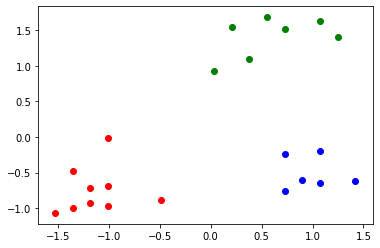

In [31]:
#scatter plot 
plt.scatter(df1["Age"],df1["Income"],color="green")
plt.scatter(df2["Age"],df2["Income"],color="red")
plt.scatter(df3["Age"],df3["Income"],color="blue")
plt.show()

In [32]:
#to show center point of each cluster
km.cluster_centers_  #to show centroid 0f each cluster
#cluster_centers_  inbuilt method of KMeans 

array([[ 0.60143983,  1.40141653],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261]])

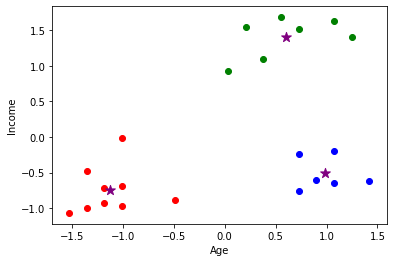

In [36]:
#scatter plot 
plt.scatter(df1["Age"],df1["Income"],color="green")
plt.scatter(df2["Age"],df2["Income"],color="red")
plt.scatter(df3["Age"],df3["Income"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",s=105,
           color="purple") 
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()


In [ ]:
#Elbow methods : what is the value of k 

In [37]:
#We create a attay which stored the value of sum of squared error (SSE) 
#for various value of k
sse=[] #declare blank array for SSE means decalre empty list
k_rng=range(1,11)
for k in k_rng:
    km=KMeans(n_clusters=k) 
    km.fit(df[['Age','Income']]) #train then model
    sse.append(km.inertia_)  
    #inertia_ inbuilt method of KMeans class which find the error means
    #SSE error (sum of squared error ) and stored in sse array
    

In [38]:
sse

[43.99999999999999,
 16.194890274706772,
 3.8893086571301416,
 2.8287633800935246,
 2.1690542993949644,
 1.7149245376922924,
 1.3782407911524643,
 1.1093855705710265,
 0.8983727091879568,
 0.664070501620059]

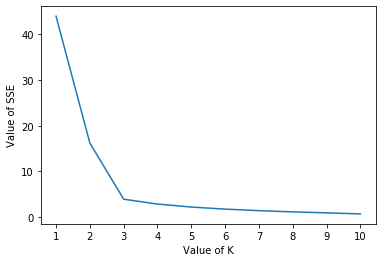

In [40]:
#We plot 2D graph between sse and k
plt.xlabel('Value of K')
plt.ylabel('Value of SSE')
plt.plot(k_rng,sse) #line graph : plot(x,y)
plt.xticks(k_rng)
plt.show()

In [ ]:
#kere decide k=3